**Importing Required Packages**

Primary package for this project are Pandas for data processing, Numpy to work with arrays, matplotlib and seaborn for data visualization and finally scikit-learn for building and evaluating our model.

In [33]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with array
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm

from sklearn.metrics import explained_variance_score as evs #evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20,10) # plot size 



In [47]:
# IMPORTING DATA
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMLP/Housing.csv')


df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Exploratory Data analysis (EDA)

To analyze data using visual technique


In [35]:
df.dropna(inplace = True)

In [36]:
print(cl(df.isnull().sum(),attrs=['bold']))

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [37]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [38]:
print(cl(df.dtypes,attrs = ['bold']))

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [39]:
# replacing values
df['mainroad'].replace(['yes', 'no'],[1, 0], inplace=True)
df['guestroom'].replace(['yes', 'no'],[1, 0], inplace=True)
df['basement'].replace(['yes', 'no'],[1, 0], inplace=True)
df['hotwaterheating'].replace(['yes', 'no'],[1, 0], inplace=True)
df['airconditioning'].replace(['yes', 'no'],[1, 0], inplace=True)
df['prefarea'].replace(['yes', 'no'],[1, 0], inplace=True)
df['furnishingstatus'].replace(['furnished', 'semi-furnished','unfurnished'],[2, 1,0], inplace=True)

# df['mainroad'] = df['mainroad'].astype('int')
df.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [40]:
print(cl(df.dtypes, attrs = ['bold']))

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


In [41]:
# Feature Selection and Data Split
X_var = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']].values
y_var = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)
print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])


X_train samples :  [[3620    2    1    1    1    0    0    0    0    0    0    0]
 [4000    2    1    1    1    0    0    0    0    0    0    0]
 [3040    2    1    1    0    0    0    0    0    0    0    0]
 [3600    2    1    1    1    0    0    0    0    0    0    0]
 [9860    3    1    1    1    0    0    0    0    0    0    1]]
X_test samples :  [[ 4000     3     1     2     1     0     0     0     0     1     0     2]
 [ 9620     3     1     1     1     0     1     0     0     2     1     2]
 [ 3460     4     1     2     1     0     0     0     1     0     0     1]
 [13200     2     1     1     1     0     1     1     0     1     0     2]
 [ 3660     4     1     2     0     0     0     0     0     0     0     0]]
y_train samples :  [1750000 2695000 2870000 2590000 4515000]
y_test samples :  [4585000 6083000 4007500 6930000 2940000]


In [42]:
# Modeling

# 1. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 2. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

In [43]:
# 1. Explained Variance Score
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.6623839100734403
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.6602066207013113
-------------------------------------------------------------------------------


In [44]:
# 2. R-squared
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.660028208997669
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.6578047780536478
-------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


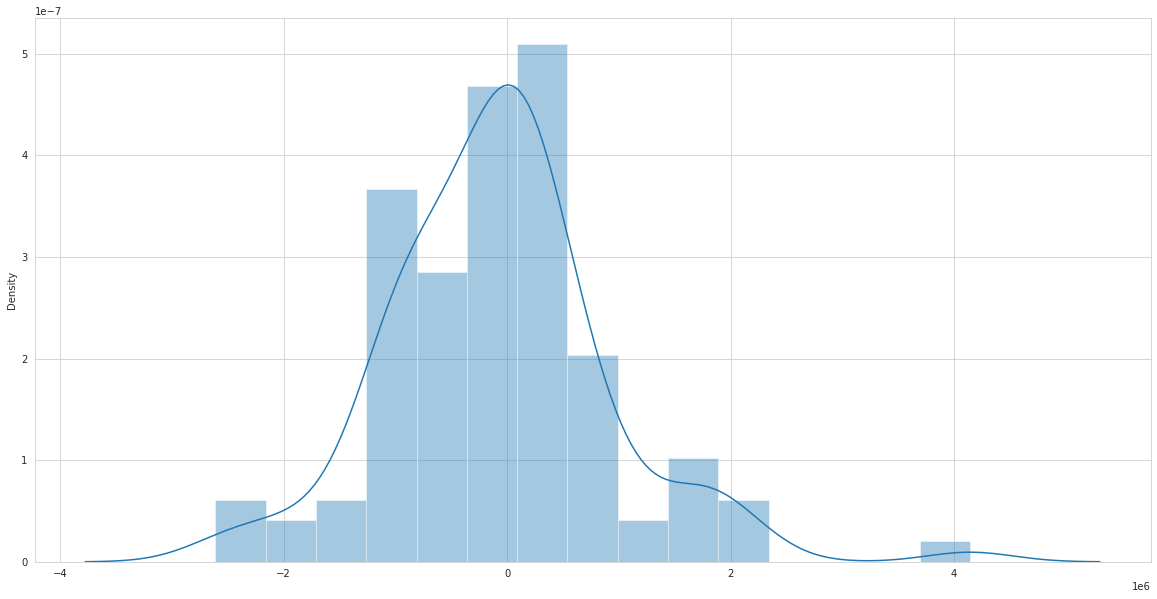

In [45]:
sb.distplot(y_test-ridge_yhat)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


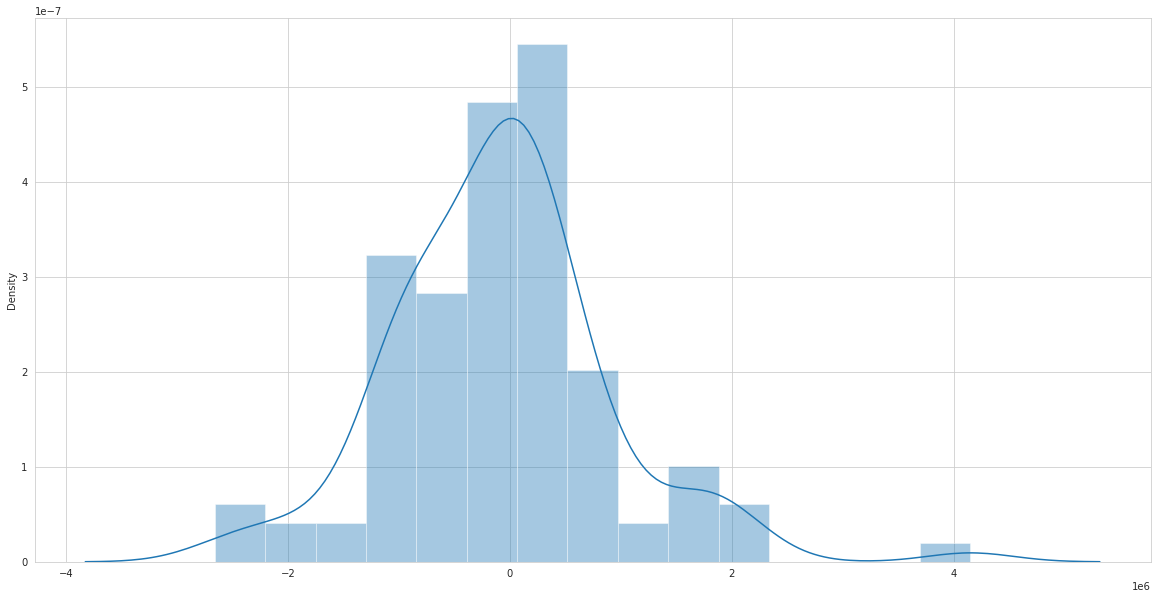

In [46]:
sb.distplot(y_test-lasso_yhat)